In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
%matplotlib inline
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import json
import sklearn
from nltk.corpus import stopwords
from scipy.sparse import csr_matrix
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from scipy.sparse.linalg import svds
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from pandas.io.json import json_normalize


# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

In [2]:
df_main = pd.read_csv('/Users/dilruba_p/Desktop/ted_main.csv')
df_trans = pd.read_csv('/Users/dilruba_p/Desktop/transcripts.csv')


****Features Available¶
* * name: The official name of the TED Talk. Includes the title and the speaker.
* title: The title of the talk
* description: A blurb of what the talk is about.
* main_speaker: The first named speaker of the talk.
* speaker_occupation: The occupation of the main speaker.
* num_speaker: The number of speakers in the talk.
* duration: The duration of the talk in seconds.
* event: The TED/TEDx event where the talk took place.
* film_date: The Unix timestamp of the filming.
* published_date: The Unix timestamp for the publication of the talk on TED.com
* comments: The number of first level comments made on the talk.
* tags: The themes associated with the talk.
* languages: The number of languages in which the talk is available.
* ratings: A stringified dictionary of the various ratings given to the talk (inspiring, fascinating, jaw dropping, etc.)
* related_talks: A list of dictionaries of recommended talks to watch next.
* url: The URL of the talk.
* views: The number of views on the

* Ideas to be considered for EDA , modelling and feature engineering 
* Num of  views  by veue, duration of talk, occupation and title,name

* num of view by the date
* regresssion to understand what affects the  number of views
*  views vs  rate vs comment 
* how many related yopics are views  by the suggestion of the talk
* regression to understand 
* most used tags by years
* Average Views Per Top 5 Occupation
* Translations in many languages (also, naturally).
* Higher number of tags, ideally between 3–8 promotes better visibility??
* how topics,tags changed by time.
* possible  tag combinations for playlist suggestions 

In [3]:
df_main.head(10)

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,1140825600,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,"['children', 'creativity', 'culture', 'dance',...",Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110
1,265,With the same humor and humanity he exuded in ...,977,TED2006,1140825600,43,Al Gore,Al Gore: Averting the climate crisis,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...","[{'id': 243, 'hero': 'https://pe.tedcdn.com/im...",Climate advocate,"['alternative energy', 'cars', 'climate change...",Averting the climate crisis,https://www.ted.com/talks/al_gore_on_averting_...,3200520
2,124,New York Times columnist David Pogue takes aim...,1286,TED2006,1140739200,26,David Pogue,David Pogue: Simplicity sells,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 964}, {'i...","[{'id': 1725, 'hero': 'https://pe.tedcdn.com/i...",Technology columnist,"['computers', 'entertainment', 'interface desi...",Simplicity sells,https://www.ted.com/talks/david_pogue_says_sim...,1636292
3,200,"In an emotionally charged talk, MacArthur-winn...",1116,TED2006,1140912000,35,Majora Carter,Majora Carter: Greening the ghetto,1,1151367060,"[{'id': 3, 'name': 'Courageous', 'count': 760}...","[{'id': 1041, 'hero': 'https://pe.tedcdn.com/i...",Activist for environmental justice,"['MacArthur grant', 'activism', 'business', 'c...",Greening the ghetto,https://www.ted.com/talks/majora_carter_s_tale...,1697550
4,593,You've never seen data presented like this. Wi...,1190,TED2006,1140566400,48,Hans Rosling,Hans Rosling: The best stats you've ever seen,1,1151440680,"[{'id': 9, 'name': 'Ingenious', 'count': 3202}...","[{'id': 2056, 'hero': 'https://pe.tedcdn.com/i...",Global health expert; data visionary,"['Africa', 'Asia', 'Google', 'demo', 'economic...",The best stats you've ever seen,https://www.ted.com/talks/hans_rosling_shows_t...,12005869
5,672,"Tony Robbins discusses the ""invisible forces"" ...",1305,TED2006,1138838400,36,Tony Robbins,Tony Robbins: Why we do what we do,1,1151440680,"[{'id': 7, 'name': 'Funny', 'count': 1102}, {'...","[{'id': 229, 'hero': 'https://pe.tedcdn.com/im...",Life coach; expert in leadership psychology,"['business', 'culture', 'entertainment', 'goal...",Why we do what we do,https://www.ted.com/talks/tony_robbins_asks_wh...,20685401
6,919,When two young Mormon missionaries knock on Ju...,992,TED2006,1140739200,31,Julia Sweeney,Julia Sweeney: Letting go of God,1,1152490260,"[{'id': 3, 'name': 'Courageous', 'count': 477}...","[{'id': 22, 'hero': 'https://pe.tedcdn.com/ima...","Actor, comedian, playwright","['Christianity', 'God', 'atheism', 'comedy', '...",Letting go of God,https://www.ted.com/talks/julia_sweeney_on_let...,3769987
7,46,Architect Joshua Prince-Ramus takes the audien...,1198,TED2006,1140652800,19,Joshua Prince-Ramus,Joshua Prince-Ramus: Behind the design of Seat...,1,1152490260,"[{'id': 9, 'name': 'Ingenious', 'count': 195},...","[{'id': 750, 'hero': 'https://pe.tedcdn.com/im...",Architect,"['architecture', 'collaboration', 'culture', '...",Behind the design of Seattle's library,https://www.ted.com/talks/joshua_prince_ramus_...,967741
8,852,Philosopher Dan Dennett calls for religion -- ...,1485,TED2006,1138838400,32,Dan Dennett,Dan Dennett: Let's teach religion -- all relig...,1,1153181460,"[{'id': 3, 'name': 'Courageous', 'count': 562}...","[{'id': 71, 'hero': 'https://pe.tedcdn.com/ima...","Philosopher, cognitive scientist","['God', 'TED Brain Trust', 'atheism', 'brain',...",Let's teach religion -- all religion -- in sch...,https://www.ted.com/talks/dan_dennett_s_respon...,2567958
9,900,"Pastor Rick Warren, author of ""The Purpose-Dri...",1262,T

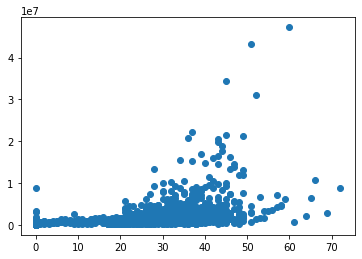

In [4]:
plt.scatter(df_main['languages'],df_main['views'])

**Performance of TED talks by event type

In [5]:
df_main.isnull().sum() # as can be seen there is only null values in speaker occupation and only 6 of them , for now I am going to 

# leave them as nan

comments              0
description           0
duration              0
event                 0
film_date             0
languages             0
main_speaker          0
name                  0
num_speaker           0
published_date        0
ratings               0
related_talks         0
speaker_occupation    6
tags                  0
title                 0
url                   0
views                 0
dtype: int64

In [6]:
event_df=df_main.groupby(['event'])['tags'].agg(pd.Series.mode).reset_index()[['event', 'tags']]
event_df.head(5)

,event,tags
0,AORN Congress,"['business', 'life', 'money', 'presentation']"
1,Arbejdsglaede Live,"['business', 'happiness', 'life', 'mind', 'psy..."
2,BBC TV,"['astronomy', 'physics', 'science']"
3,Bowery Poetry Club,"['education', 'performance', 'poetry', 'writing']"
4,Business Innovation Factory,"[['art', 'collaboration', 'design', 'engineeri..."


Manipulation on duration and  views

***  Words per miute to understand the frequency of the words used.

In [7]:
df_main['duration']=df_main['duration']/60 # convert into minutes 

In [8]:
df_main = pd.merge(left=df_main,right=df_trans, how='left', left_on='url', right_on='url')
df_main.head()

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views,transcript
0,4553,Sir Ken Robinson makes an entertaining and pro...,19.400000,TED2006,1140825600,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,"['children', 'creativity', 'culture', 'dance',...",Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110,Good morning. How are you?(Laughter)It's been ...
1,265,With the same humor and humanity he exuded in ...,16.283333,TED2006,1140825600,43,Al Gore,Al Gore: Averting the climate crisis,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...","[{'id': 243, 'hero': 'https://pe.tedcdn.com/im...",Climate advocate,"['alternative energy', 'cars', 'climate change...",Averting the climate crisis,https://www.ted.com/talks/al_gore_on_averting_...,3200520,"Thank you so much, Chris. And it's truly a gre..."
2,124,New York Times columnist David Pogue takes aim...,21.433333,TED2006,1140739200,26,David Pogue,David Pogue: Simplicity sells,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 964}, {'i...","[{'id': 1725, 'hero': 'https://pe.tedcdn.com/i...",Technology columnist,"['computers', 'entertainment', 'interface desi...",Simplicity sells,https://www.ted.com/talks/david_pogue_says_sim...,1636292,"(Music: ""The Sound of Silence,"" Simon & Garfun..."
3,200,"In an emotionally charged talk, MacArthur-winn...",18.600000,TED2006,1140912000,35,Majora Carter,Majora Carter: Greening the ghetto,1,1151367060,"[{'id': 3, 'name': 'Courageous', 'count': 760}...","[{'id': 1041, 'hero': 'https://pe.tedcdn.com/i...",Activist for environmental justice,"['MacArthur grant', 'activism', 'business', 'c...",Greening the ghetto,https://www.ted.com/talks/majora_carter_s_tale...,1697550,If you're here today — and I'm very happy that...
4,593,You've never seen data presented like this. Wi...,19.833333,TED2006,1140566400,48,Hans Rosling,Hans Rosling: The best stats you've ever seen,1,1151440680,"[{'id': 9, 'name': 'Ingenious', 'count': 3202}...","[{'id': 2056, 'hero': 'https://pe.tedcdn.com/i...",Global health expert; data visionary,"['Africa', 'Asia', 'Google', 'demo', 'economic...",The best stats you've ever seen,https://www.ted.com/talks/hans_rosling_shows_t...,12005869,"About 10 years ago, I took on the task to teac..."


In [9]:
df_main['transcript'] = df_main['transcript'].fillna('')
df_main['word_count'] = df_main['transcript'].apply(lambda x: len(x.split()))

In [10]:
df_main['words_per_minute']=df_main['word_count']/df_main['duration']

In [11]:
df_main[['title', 'main_speaker','views', 'comments']].sort_values('comments', ascending=False).head(10)

,title,main_speaker,views,comments
96,Militant atheism,Richard Dawkins,4374792,6404
0,Do schools kill creativity?,Ken Robinson,47227110,4553
644,Science can answer moral questions,Sam Harris,3433437,3356
201,My stroke of insight,Jill Bolte Taylor,21190883,2877
1790,How do you explain consciousness?,David Chalmers,2162764,2673
954,Taking imagination seriously,Janet Echelman,1832930,2492
840,On reading the Koran,Lesley Hazleton,1847256,2374
1349,Your body language may shape who you are,Amy Cuddy,43155405,2290
661,The danger of science denial,Michael Specter,1838628,2272
677,How great leaders inspire action,Simon Sinek,34309432,1930


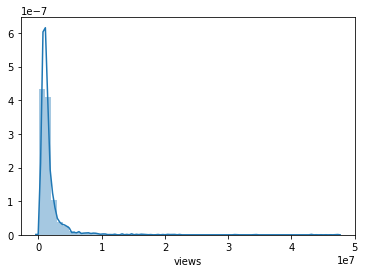

In [12]:
sns.distplot(df_main['views'])

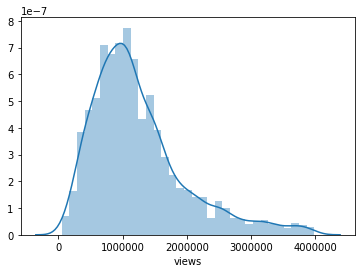

In [13]:
sns.distplot(df_main[df_main['views'] < 0.4e7]['views'])

In [14]:
import datetime
df_main['film_date'] = df_main['film_date'].apply(lambda x: datetime.datetime.fromtimestamp( int(x)).strftime('%d-%m-%Y'))
df_main['published_date'] = df_main['published_date'].apply(lambda x: datetime.datetime.fromtimestamp( int(x)).strftime('%d-%m-%Y'))

In [15]:
df_main[['views', 'comments']].corr()

,views,comments
views,1.000000,0.531517
comments,0.531517,1.000000


Correlation between variables

****There is a  correlation between  comments and views

In [16]:
#occupation_df = df_main.groupby('speaker_occupation').count().reset_index()[['speaker_occupation', 'comments']]
#occupation_df.columns = ['occupation', 'appearances']
#occupation_df = occupation_df.sort_values('appearances', ascending=False)

In [17]:
#df_main['speaker_occupation']=df_main['speaker_occupation'][df_main['speaker_occupation'].isin(occupation_df.head(10)['occupation'])]

****Based on the graph above  i decided to create 4 different categories   for views

**** How much  description affcets  the count of the views>

In [18]:
df_main['description_len']=df_main['description'].apply(lambda x: len(x))

**** Popularity increased fast since  2006 , 2012 was the pick year.

**** Tag  analysis

**** Does  number of tags has an affect on the   success of the talk?

**** How many tags  each talk have?

In [19]:
df_main['tags_len'] = df_main['tags'].apply(lambda x: len(x.split(',')))

**** Now that  we hvae the unique  names for each rating we can start the reduction of it

**** Tag analysis by years

******  as can be seen frm the graph above  published date has so many data points might be better to  compare it with the years instead

****From the boxplot above we cab

****for all the funny , tags with a  score higher than threshold what was the reason for it?

**** LINEAR REGRESSION

In [20]:
df_main = df_main.drop('description', axis = 1)

In [21]:
import ast
df_main['ratings'] = df_main['ratings'].apply(lambda x: ast.literal_eval(x))
df_main['funny'] = df_main['ratings'].apply(lambda x: x[0]['count'])
df_main['jawdrop'] = df_main['ratings'].apply(lambda x: x[-3]['count'])
df_main['beautiful'] = df_main['ratings'].apply(lambda x: x[3]['count'])
df_main['confusing'] = df_main['ratings'].apply(lambda x: x[2]['count'])
df_main.head()

,comments,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,...,views,transcript,word_count,words_per_minute,description_len,tags_len,funny,jawdrop,beautiful,confusing
0,4553,19.400000,TED2006,24-02-2006,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,26-06-2006,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...",...,47227110,Good morning. How are you?(Laughter)It's been ...,3066,158.041237,149,7,19645,1174,3253,6073
1,265,16.283333,TED2006,24-02-2006,43,Al Gore,Al Gore: Averting the climate crisis,1,26-06-2006,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...",...,3200520,"Thank you so much, Chris. And it's truly a gre...",2089,128.290686,233,9,544,116,58,62
2,124,21.433333,TED2006,23-02-2006,26,David Pogue,David Pogue: Simplicity sells,1,26-06-2006,"[{'id': 7, 'name': 'Funny', 'count': 964}, {'i...",...,1636292,"(Music: ""The Sound of Silence,"" Simon & Garfun...",3253,151.772939,202,9,964,230,60,183
3,200,18.600000,TED2006,25-02-2006,35,Majora Carter,Majora Carter: Greening the ghetto,1,26-06-2006,"[{'id': 3, 'name': 'Courageous', 'count': 760}...",...,1697550,If you're here today — and I'm very happy that...,3015,162.096774,213,9,760,230,59,32
4,593,19.833333,TED2006,21-02-2006,48,Hans Rosling,Hans Rosling: The best stats you've ever seen,1,27-06-2006,"[{'id': 9, 'name': 'Ingenious', 'count': 3202}...",...,12005869,"About 10 years ago, I took on the task to teac...",3121,157.361345,172,11,3202,2542,318,942


In [23]:
df_main['ratings_name']=df_main['ratings'].apply(lambda x:x[0]['name'])

In [24]:
replacement = {
    'Funny': 'P',
    'Beautiful': 'P',
    'Courageous': 'P',
    'Jaw-dropping': 'P',
    'Informative': 'P',
    'Inspiring': 'P',
    'Persuasive': 'P',
    'Fascinating': 'P',
    'OK': 'OK',
    'Ingenious': 'N',
    'Unconvincing': 'N',
    'Longwinded': 'N',
    'Confusing': 'N',
    'Obnoxious': 'N',
  
}

df_main['rating_level'] = df_main['ratings_name'].apply(lambda x: replacement.get(x))
df_main['rating_level']

0        P
1        P
2        P
3        P
4        N
5        P
6        P
7        N
8        P
9        N
10       P
11       P
12       P
13       N
14       P
15       P
16       P
17       N
18       P
19       P
20       N
21       P
22       P
23       P
24       P
25       N
26       P
27       P
28       P
29       P
        ..
2523     P
2524     P
2525     P
2526     P
2527     P
2528     P
2529     P
2530     P
2531     N
2532     N
2533     N
2534     P
2535    OK
2536     P
2537     P
2538     P
2539     P
2540     P
2541     P
2542     P
2543     P
2544     N
2545     P
2546     P
2547     P
2548     P
2549     P
2550     P
2551     N
2552     N
Name: rating_level, Length: 2553, dtype: object

In [25]:
df_main=df_main.drop(['name','ratings','event','published_date','event','film_date','main_speaker','related_talks','title','tags','url','transcript'
                     ], axis = 1)

In [34]:
df_main=df_main.drop('ratings_name', axis = 1)

KeyError: "['ratings_name'] not found in axis"

In [26]:
replacement = {
    'Writer': '1',
    'Designer': '2',
    'Artist': '3',
    'Journalist': '4',
    'Entrepreneur': '5',
    'Architect': '6',
    'Inventor': '7',
    'Psychologist': '8',
    'Photographer': '9',
    'Filmmaker': '10'}

df_main['speaker_occupation'] = df_main['speaker_occupation'].apply(lambda x: replacement.get(x))
df_main['speaker_occupation']

0       None
1       None
2       None
3       None
4       None
5       None
6       None
7          6
8       None
9       None
10      None
11        10
12      None
13      None
14      None
15      None
16      None
17      None
18      None
19      None
20      None
21      None
22      None
23      None
24      None
25      None
26      None
27      None
28         1
29      None
        ... 
2523    None
2524    None
2525    None
2526       5
2527    None
2528    None
2529    None
2530    None
2531    None
2532    None
2533       3
2534    None
2535    None
2536       3
2537    None
2538    None
2539    None
2540    None
2541    None
2542    None
2543    None
2544    None
2545       3
2546    None
2547    None
2548       4
2549    None
2550    None
2551    None
2552    None
Name: speaker_occupation, Length: 2553, dtype: object

In [29]:
df_main=df_main.dropna()
y = df_main['rating_level']

df_main = df_main.drop('rating_level', axis = 1)


print("Shape of y:", y.shape)

Shape of y: (306,)


In [37]:

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(df_main, y, test_size = 0.2, random_state = 0)

# getting the shapes
print("Shape of x_train :", x_train.shape)
print("Shape of x_test :", x_test.shape)
print("Shape of y_train :", y_train.shape)
print("Shape of y_test :", y_test.shape)

Shape of x_train : (244, 34)
Shape of x_test : (62, 34)
Shape of y_train : (244,)
Shape of y_test : (62,)


In [42]:
x_train.columns

Index(['duration', 'languages', 'num_speaker', 'views', 'word_count',
       'words_per_minute', 'description_len', 'tags_len', 'funny', 'jawdrop',
       'beautiful', 'confusing', 'speaker_occupation_10',
       'speaker_occupation_2', 'speaker_occupation_3', 'speaker_occupation_4',
       'speaker_occupation_5', 'speaker_occupation_6', 'speaker_occupation_7',
       'speaker_occupation_8', 'speaker_occupation_9',
       'ratings_name_Confusing', 'ratings_name_Courageous',
       'ratings_name_Fascinating', 'ratings_name_Funny',
       'ratings_name_Informative', 'ratings_name_Ingenious',
       'ratings_name_Inspiring', 'ratings_name_Jaw-dropping',
       'ratings_name_Longwinded', 'ratings_name_OK', 'ratings_name_Obnoxious',
       'ratings_name_Persuasive', 'ratings_name_Unconvincing'],
      dtype='object')

Training Accuracy : 0.9836065573770492
Testing Accuracy : 0.8548387096774194
              precision    recall  f1-score   support

           N       1.00      0.60      0.75        20
          OK       1.00      0.67      0.80         3
           P       0.81      1.00      0.90        39

    accuracy                           0.85        62
   macro avg       0.94      0.76      0.82        62
weighted avg       0.88      0.85      0.84        62



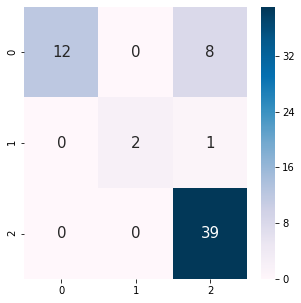

In [39]:
# Random Forest Classifier

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
df_main = pd.get_dummies(df_main, drop_first=True)
#x_train=x_train.dropna()
y_train=y_train.dropna()
model = RandomForestClassifier(n_estimators = 50, max_depth = 5)
model.fit(x_train, y_train)
y_predict = model.predict(x_test)
y_pred_quant = model.predict_proba(x_test)[:, 1]
y_pred = model.predict(x_test)

# evaluating the model
print("Training Accuracy :", model.score(x_train, y_train))
print("Testing Accuracy :", model.score(x_test, y_test))

# cofusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.rcParams['figure.figsize'] = (5, 5)
sns.heatmap(cm, annot = True, annot_kws = {'size':15}, cmap = 'PuBu')

# classification report
cr = classification_report(y_test, y_pred)
print(cr)

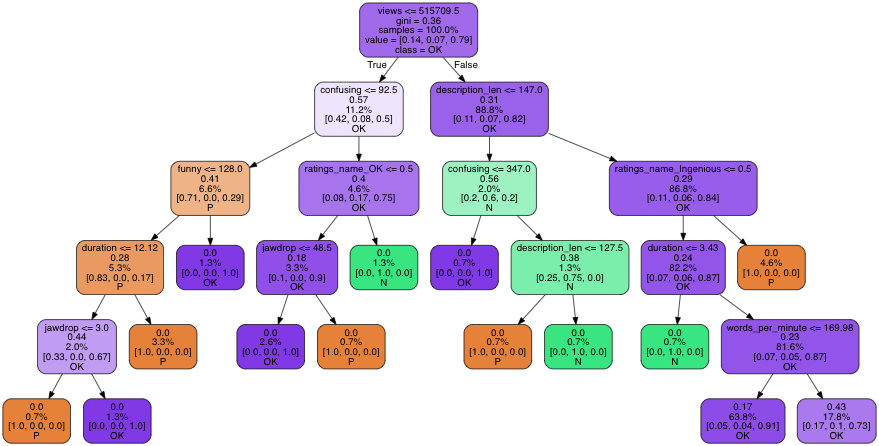

In [40]:
from sklearn.tree import export_graphviz

estimator = model.estimators_[1]
feature_names = [i for i in x_train.columns]

y_train_str = y_train.astype('str')
y_train_str[y_train_str == 'N'] = 'N'
y_train_str[y_train_str == 'P'] = 'P'
y_train_str = y_train_str.values


export_graphviz(estimator, out_file='tree.dot', 
                feature_names = feature_names,
                class_names = y_train_str,
                rounded = True, proportion = True, 
                label='root',
                precision = 2, filled = True)

from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=50'])

from IPython.display import Image
Image(filename = 'tree.png')

In [41]:
df_main.to_csv('out_ted.csv')